In [1]:
from IPython.display import Image, display

### Exercício Numpy

**Objetivo**

Separar dados em diferentes grupos utilizando a lógica do algoritmo **K-Means**

**Definição do Problema**

Queremos um programa que receba como entrada uma matriz no formato (N, 2) e um número k de grupos

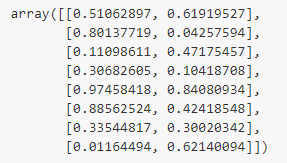

In [2]:
display(Image('imagens/numpy_1.png'))

Podemos entender cada linha como um conjunto (x,y) no campo cartesiano.

Logo, se eu fizessemos um gráfico desses pontos acima, teríamos:

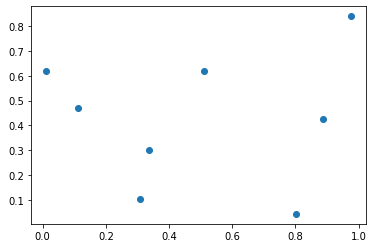

In [17]:
display(Image('imagens/numpy_2.png'))

O objetivo é **calcular rótulos** para cada um desses pontos, de forma que, no final, possamos separá-los.

Por exemplo, se quisessemos 2 grupos distintos (k = 2), teríamos:

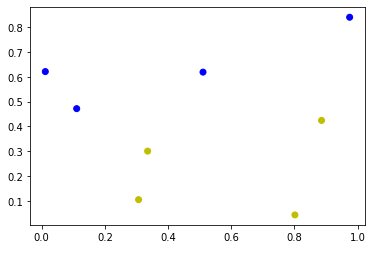

In [18]:
display(Image('imagens/numpy_3.png'))

Cada grupo recebe uma cor diferente.

Já para 3 grupos (k = 3), teríamos:

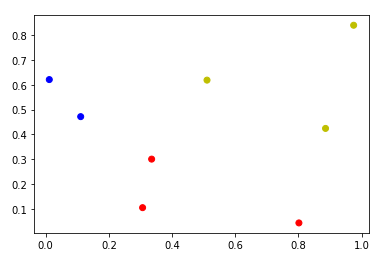

In [19]:
display(Image('imagens/numpy_4.png'))

Note que **não** precisamos ter a **mesma quantidade** de pontos em cada grupo!

### **Parte 1**

A primeira parte da resolução do problema consiste em gerar um array com a informação do grupo de cada um dos pontos.

Para isso você deve criar uma função com a seguinte assinatura:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def grouping(data, k = 2, max_iter = 100, verbose = False):
    '''
    Função que separa os dados em diferentes classes
    
    Params:
        data (np.array): Conjunto de N pontos (x, y)
        k (int): Definição do número de grupos em que os dados serão separados (k >= 1)
        max_inter (int): Limitador do número de iterações
        
    Returns:
        grupos (np.array): Array com o a informação de grupo de cada um dos pontos    
    '''
    centroides = estimar_centroide_inicial(data, k)

    i = 0
    parar_loop = False
    while not parar_loop:
        i += 1 
        matriz_distancias = calcular_martriz_distancias(data, centroides)
        agrupamento = agrupar_por_distancia(matriz_distancias)
        centroides_novos = calcular_centroide(data, agrupamento)
        convergido = np.array_equal(centroides_novos, centroides)
        centroides = centroides_novos
        acancado_limite = i >= max_iter
        parar_loop = convergido or acancado_limite
        
        if verbose:
            print(f'Interação {i}: Agrupamento: {agrupamento}.')
    
    return agrupamento


def estimar_centroide_inicial(data, k):
    max_values = data.max(axis=0)
    min_values = data.min(axis=0)
    n_features = data.shape[1]

    return np.random.uniform(low=min_values, high=max_values, size=(k,n_features))

def calcular_martriz_distancias(data,centroides):
    n_pontos = data.shape[0]
    k = centroides.shape[0]
    matriz_distancias = np.ones((n_pontos,k))
    for row, ponto in enumerate(data):
        for col, centroide in enumerate(centroides):
            matriz_distancias[row,col] = np.sqrt(np.sum(np.square(ponto-centroide)))
            
    return matriz_distancias    

def agrupar_por_distancia(matriz_distancias):
    return np.argmin(matriz_distancias,axis=1)

def calcular_centroide(data,agrupamento):
    k = 1 + agrupamento.max()
    n_features = data.shape[1]
    centroides = np.ones((k,n_features))
    for centroide_calculado in range(k):
        mascara = agrupamento == centroide_calculado
        centroides[centroide_calculado] = data[mascara].mean(axis=0)
        
    return centroides


def kplot_2d(data, agrupamento):
  plt.figure(figsize=(6, 6))
  plt.scatter(data[:,0], data[:,1], s = 50, c=plt.cm.tab20(agrupamento))
  plt.show()

O argumento **max_iter** serve para não entrarmos em um **loop infinito**. Logo, seu código deve rodar no máximo max_iter vezes.

Um possível retorno considerando, por exemplo, k = 3, seria:

In [4]:
np.random.seed(42)
data = np.random.rand(300,2)
k = 10

agrupamento = grouping(data, k = k, max_iter = 100)

In [5]:
agrupamento

array([4, 9, 8, 5, 4, 5, 6, 8, 2, 1, 6, 0, 4, 2, 6, 6, 5, 7, 1, 3, 2, 5,
       2, 2, 1, 7, 7, 4, 8, 0, 1, 9, 2, 5, 5, 6, 5, 7, 6, 1, 9, 1, 0, 9,
       9, 2, 9, 9, 3, 8, 2, 2, 6, 4, 8, 1, 7, 4, 6, 9, 7, 1, 0, 7, 2, 1,
       0, 9, 4, 4, 6, 3, 1, 3, 0, 6, 2, 6, 4, 2, 4, 3, 5, 1, 2, 6, 1, 6,
       3, 6, 1, 7, 2, 9, 1, 5, 9, 0, 7, 7, 6, 5, 6, 2, 8, 4, 6, 6, 4, 4,
       3, 0, 0, 9, 9, 9, 3, 2, 1, 6, 7, 9, 5, 4, 7, 0, 9, 2, 7, 6, 4, 2,
       7, 7, 1, 7, 7, 3, 9, 7, 9, 1, 6, 3, 2, 8, 9, 2, 6, 6, 2, 4, 7, 3,
       6, 1, 5, 7, 1, 0, 4, 6, 7, 3, 1, 4, 8, 8, 7, 1, 3, 0, 4, 6, 4, 4,
       6, 2, 2, 9, 4, 3, 9, 7, 8, 8, 2, 0, 6, 6, 2, 4, 7, 1, 7, 9, 4, 4,
       9, 7, 5, 4, 4, 1, 6, 4, 9, 3, 0, 4, 7, 2, 2, 4, 1, 5, 6, 2, 5, 6,
       5, 3, 7, 7, 1, 9, 4, 2, 2, 8, 2, 9, 9, 5, 5, 5, 5, 4, 2, 9, 4, 4,
       4, 0, 7, 4, 1, 3, 6, 7, 9, 4, 6, 7, 7, 3, 7, 8, 4, 6, 3, 7, 9, 1,
       5, 7, 9, 7, 6, 1, 9, 2, 3, 2, 4, 4, 3, 9, 8, 9, 6, 8, 2, 3, 9, 4,
       4, 7, 5, 1, 4, 3, 6, 8, 8, 2, 0, 9, 6, 8], d

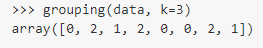

In [20]:
display(Image('imagens/numpy_5.png'))

### **Parte 2**

A segunda parte do problema consiste em gerar o resultado da separação dos grupos de maneira gráfica.

Utilize a ferramenta gráfica que preferir. Seu código deve ser capaz de gerar um resultado gráfico para uma grande quantidade de dados:

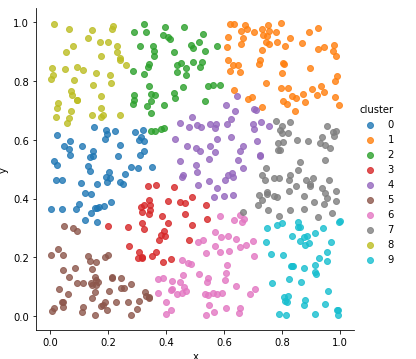

In [27]:
display(Image('imagens/numpy_6.png'))

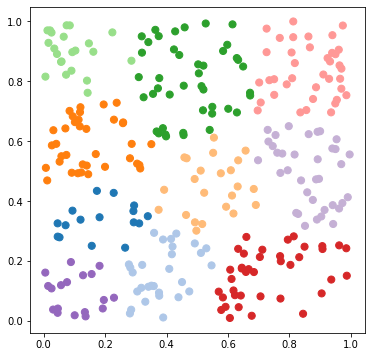

In [6]:
kplot_2d(data, agrupamento)

### **Passo a passo do algoritmo**

**Passo 1: Fornecer valores para os centróides**

Centróides nada mais são do que pontos centrais aos grupos que serão criados.

Neste passo devemos criar os k centróides, que devem receber valores iniciais.

Uma possível escolha inicial são números aleatórios no intervalo do menor número dos dados e do maior número dos dados.

**Passo 2: Gerar uma matriz de distância entre cada ponto e os centróides**

Neste passo, a distância euclidiana entre cada ponto e os centróides é calculada. A parte mais “pesada” de cálculos ocorre neste passo pois se temos N pontos e k centróides teremos que calcular N x k distâncias neste passo.

**Passo 3: Colocar cada ponto nas classes de acordo com a sua distância do centróide da classe**

Aqui, os pontos são classificados de acordo com sua distância dos centróides de cada classe. A classificação funciona assim: o centróide que está mais perto deste ponto vai “incorporá-lo”, ou seja, o ponto vai pertencer à classe representada pelo centróide que está mais perto do ponto.

É importante dizer que o algoritmo termina se nenhum ponto “mudar” de classe depois de uma iteração antes que o max_iter seja alcançado, ou seja, se nenhum ponto for “incorporado” a uma classe diferente da que ele estava antes deste passo.

Exemplo: temos os pontos A-I e os centróides 0 e 1.

Ponto   | Distância Centróide 0 | Distância Centróide 1
--------- | ------ | ------
A | 5 | 8
B | 13 | 10
C | 16 | 11
D | 11 | 8
E | 8 | 12
F | 15 | 8
G | 25 | 20
H | 30 | 25
I | 32 | 27

* A e E ficam com centróide 0
* Demais ficam com centróide 1

Exemplo visual:

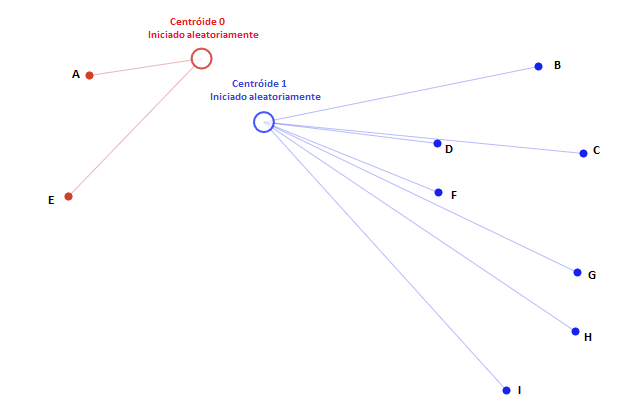

In [24]:
display(Image('imagens/numpy_7.png'))

**Passo 4: Calcular os novos centróides para cada classe**

Neste momento, os valores das coordenadas dos centróides são refinados. Para cada classe que possui mais de um ponto o novo valor dos centróides é calculado fazendo-se a média de cada atributo de todos os pontos que pertencem a esta classe.

Exemplo visual:

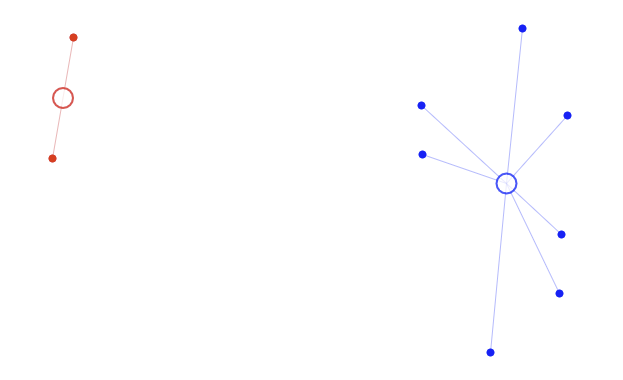

In [25]:
display(Image('imagens/numpy_8.png'))

**Passo 5: Repetir até a convergência**

O algoritmo volta para o **Passo 2** repetindo iterativamente o refinamento do cálculo das coordenadas dos centróides até o máximo de max_iter ou nenhum ponto mudar de rótulo (centróide).

Desta maneira, teremos uma classificação que coloca cada ponto em apenas uma classe.